# 1. Tennis Surface Check

Use a linear regression and statsmodels to find which surface type predicts the most points for Federer in the `tennis.csv` dataset.

1. Give a one-paragraph interpretation of the coefficients, and the meaning of the p-value. 

2. Answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

3. Do a t-test to find that the largest coefficient is statistically significantly different from the second largest (hint: you can run a t-test only with mean values and standard deviations)

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/tennis.csv').dropna()
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
5,1998,"Gstaad, Switzerland",1998-07-06,WS,Outdoor: Clay,Draw: 32,1,702.0,"$5,250",R32,...,4.0,5.0,10.0,38.0,62.0,35.0,74.0,73.0,136.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",Q,...,1.0,6.0,14.0,49.0,87.0,19.0,77.0,68.0,164.0,True
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True


In [9]:
import statsmodels.api as sm

sm.OLS(
    df['player1 total points total'],
        pd.get_dummies(df.surface)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     player1 total points total   R-squared:                       0.036
Model:                                    OLS   Adj. R-squared:                  0.032
Method:                         Least Squares   F-statistic:                     9.303
Date:                        Sat, 16 Jan 2021   Prob (F-statistic):           2.20e-07
Time:                                10:38:23   Log-Likelihood:                -5516.9
No. Observations:                        1016   AIC:                         1.104e+04
Df Residuals:                            1011   BIC:                         1.107e+04
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Indoor: Carpet   159.1754      7.330     21.714      0.000     144.791     173.560
Indoor: Hard     142.8711      3.973     35.956      0.000     135.074     150.668
Outdoor: Clay    164.5231      3.766     43.690      0.000     157.134     171.913
Outdoor: Grass   180.5565      4.970     36.329      0.000     170.804     190.309
Outdoor: Hard    161.2682      2.685     60.072      0.000     156.000     166.536
==============================================================================
Omnibus:                      168.057   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.988
Skew:                           1.027   Prob(JB):                     1.45e-64
Kurtosis:                       4.651   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
import statsmodels.api as sm

sm.OLS(
    df['player1 total points total'],
    sm.add_constant(
        pd.get_dummies(df.surface)
    )
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     player1 total points total   R-squared:                       0.036
Model:                                    OLS   Adj. R-squared:                  0.032
Method:                         Least Squares   F-statistic:                     9.303
Date:                        Sat, 16 Jan 2021   Prob (F-statistic):           2.20e-07
Time:                                10:38:20   Log-Likelihood:                -5516.9
No. Observations:                        1016   AIC:                         1.104e+04
Df Residuals:                            1011   BIC:                         1.107e+04
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            134.7324      1.792     75.183      0.000     131.216     138.249
Indoor: Carpet    24.4430      6.248      3.912      0.000      12.183      36.703
Indoor: Hard       8.1387      3.706      2.196      0.028       0.866      15.412
Outdoor: Clay     29.7907      3.559      8.371      0.000      22.807      36.774
Outdoor: Grass    45.8241      4.436     10.330      0.000      37.119      54.529
Outdoor: Hard     26.5358      2.831      9.372      0.000      20.980      32.092
==============================================================================
Omnibus:                      168.057   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.988
Skew:                           1.027   Prob(JB):                     1.45e-64
Kurtosis:                       4.651   Cond. No.                     1.45e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1. <font color='green'>The coefficients show the degree of relationships between the different surface types. It shows how they are all very different from each other and indoor/outdoor are completely different/unrelated even if they're the same (e.g. hard). The P values are all 0 to show there's no reason to reject the hypothesis and there's minimal error in the model.</font>
2. <font color='green'>The addition of a constant term would not have much effect on the overall model and the R-squared values presented.</font>

In [9]:
import statsmodels.api
import statsmodels as sm
sm.stats.weightstats.ttest_ind(np.array([180.5565, 4.970]), np.array([164.5231, 3.766]))

(0.07240722104524074, 0.9488673387795425, 2.0)

# 2. Titanic prediction contest

Use whatever tricks you can to best model whether a passenger would survive the titanic disaster (using linear regression).

1. Use non-regularized regression to build the best model you can. Show 2 alternate model speficications and explain why you chose the one you did

2. Interpret the coefficients in your model. Which attributes best relate to survival probability? How does this relate to socio-economic characteristics and "real-world" interpretation?

3. Use regularized regression to build a purely predictive model. Can you improve your accuracy? Plot the regularized model against the interpretable model predictions in a regression plot to make your case.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
pd.isnull(df).sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     372.4
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           1.41e-69
Time:                        08:42:21   Log-Likelihood:                -466.09
No. Observations:                 891   AIC:                             936.2
Df Residuals:                     889   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
female         0.7420      0.023     32.171      0.000       0.697       0.787
male           0.1889      0.017     11.102      0.000       0.156       0.222
==============================================================================
Omnibus:                       25.424   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.169
Skew:                           0.427   Prob(JB):                     1.26e-06
Kurtosis:                       2.963   Cond. No.                         1.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

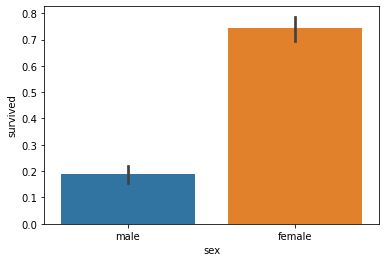

In [3]:
sns.barplot(x=df["sex"], y=df["survived"])

sm.OLS(
    df['survived'],
        pd.get_dummies(df.sex)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     57.96
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           2.18e-24
Time:                        08:42:22   Log-Likelihood:                -567.30
No. Observations:                 891   AIC:                             1141.
Df Residuals:                     888   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.6296      0.031     20.198      0.000       0.568       0.691
2              0.4728      0.034     13.999      0.000       0.407       0.539
3              0.2424      0.021     11.722      0.000       0.202       0.283
==============================================================================
Omnibus:                     1364.423   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.840
Skew:                           0.421   Prob(JB):                     1.39e-19
Kurtosis:                       1.723   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

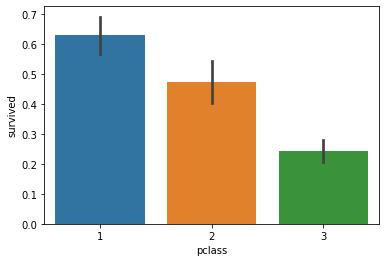

In [4]:
sns.barplot(x=df["pclass"], y=df["survived"])

sm.OLS(
    df['survived'],
        pd.get_dummies(df.pclass)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8767
Date:                Thu, 21 Jan 2021   Prob (F-statistic):              0.511
Time:                        08:42:22   Log-Likelihood:                -619.32
No. Observations:                 891   AIC:                             1253.
Df Residuals:                     884   BIC:                             1286.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0-10           0.3734      0.031     11.909      0.000       0.312       0.435
10-20          0.3826      0.045      8.429      0.000       0.294       0.472
20-30          0.3652      0.032     11.378      0.000       0.302       0.428
30-40          0.4452      0.039     11.385      0.000       0.368       0.522
40-50          0.3837      0.052      7.310      0.000       0.281       0.487
50-60          0.4048      0.075      5.389      0.000       0.257       0.552
60+            0.2273      0.104      2.190      0.029       0.024       0.431
==============================================================================
Omnibus:                     4148.713   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.229
Skew:                           0.472   Prob(JB):                     1.07e-32
Kurtosis:                       1.247   Cond. No.                         3.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

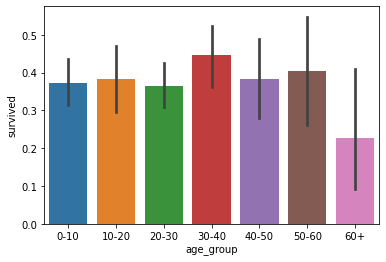

In [5]:
df["age"] = df["age"].fillna(0)
bins = [-1, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
df["age_group"] = pd.cut(df["age"], bins, labels = labels)

sns.barplot(x=df["age_group"], y=df["survived"])

sm.OLS(
    df['survived'],
        pd.get_dummies(df.age_group)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               survived   R-squared (uncentered):                   0.272
Model:                            OLS   Adj. R-squared (uncentered):              0.266
Method:                 Least Squares   F-statistic:                              47.14
Date:                Thu, 21 Jan 2021   Prob (F-statistic):                    6.36e-57
Time:                        08:42:22   Log-Likelihood:                         -696.39
No. Observations:                 891   AIC:                                      1407.
Df Residuals:                     884   BIC:                                      1440.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A              0.4667      0.137      3.405      0.001       0.198       0.736
B              0.7447      0.077      9.618      0.000       0.593       0.897
C              0.5932      0.069      8.585      0.000       0.458       0.729
D              0.7576      0.092      8.199      0.000       0.576       0.939
E              0.7500      0.094      7.993      0.000       0.566       0.934
F              0.6154      0.147      4.180      0.000       0.326       0.904
G              0.5000      0.265      1.884      0.060      -0.021       1.021
==============================================================================
Omnibus:                       39.318   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.078
Skew:                           0.435   Prob(JB):                     1.46e-08
Kurtosis:                       2.537   Cond. No.                         3.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

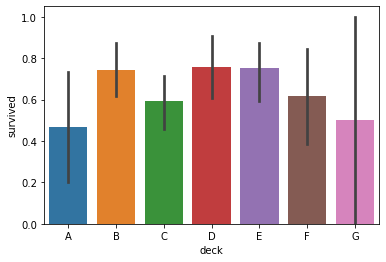

In [6]:
sns.barplot(x=df["deck"], y=df["survived"])

sm.OLS(
    df['survived'],
        pd.get_dummies(df.deck)
).fit().summary()

In [7]:
### drop all items not reviewed
df = df.drop(['sibsp',
              'parch',
              'fare',
              'embarked',
              'class',
              'who',
              'adult_male',
              'embark_town',
              'alive',
              'alone',
              'age'
             ]
             , axis=1
            )

df = df.replace({'sex': {'male': 0, 'female': 1},
            'deck': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7},
            'age_group': {'0-10': 0, '10-20': 1, '20-30': 2, '30-40': 3, '40-50': 4, '50-60': 5, '60+': 6}
           })

df = df.fillna(0)

df

,survived,pclass,sex,deck,age_group
0,0,3,0,0.0,2
1,1,1,1,3.0,3
2,1,3,1,0.0,2
3,1,1,1,3.0,3
4,0,3,0,0.0,3
...,...,...,...,...,...
886,0,2,0,0.0,2
887,1,1,1,2.0,1
888,0,3,1,0.0,0
889,1,1,0,3.0,2


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = df.drop(['survived'], axis=1)
target = df['survived']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

80.2


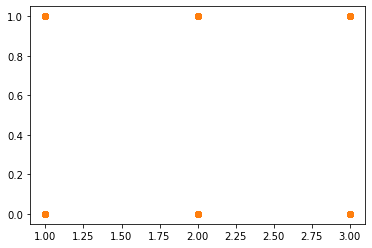

In [33]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)

plt.scatter(x_val['pclass'], y_val)
plt.scatter(x_val['pclass'], y_pred)

print(acc_gaussian)

82.23


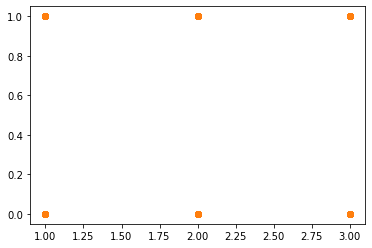

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)

plt.scatter(x_val['pclass'], y_val)
plt.scatter(x_val['pclass'], y_pred)

print(acc_logreg)

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x00000193B4DC53A0>>

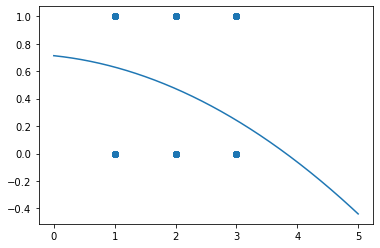

In [9]:
y = np.asarray(df['survived'])
x = np.asarray(df['pclass'])
x = sm.add_constant(x)
x = np.concatenate([x, np.square(x[:,1])[:, np.newaxis]], axis=1)

fig, ax = plt.subplots()

ax.scatter(x[:,1], y)

est = sm.OLS(y, x).fit()

xfit = sm.add_constant(np.linspace(0, 5, 1000))
xfit = np.concatenate([xfit, np.square(xfit[:,1])[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])
ax.plot(xfit[:,1], yfit)
ax.plot

<font color="green">The most important factor that can be attributed to survival are sex (female) and class (1).</font>

# 3. House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset. You also have `house_price_data_description.txt` to help -- full description of each column.

Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. **This is the target variable that you're trying to predict.**

Here are the features you can use (or engineer into new features!) for your `X` matrix:

    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

df = pd.read_csv('data/house_price.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

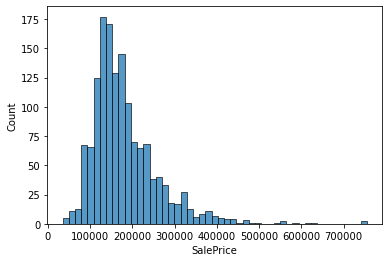

In [3]:
sns.histplot(df['SalePrice'])

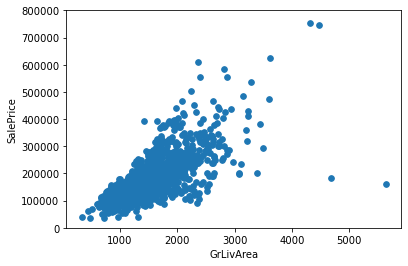

In [4]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), s=32);

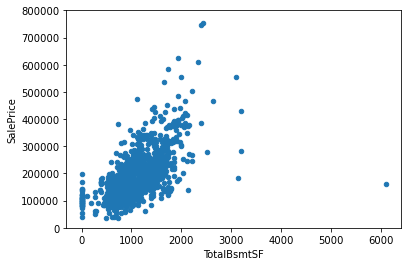

In [5]:
data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

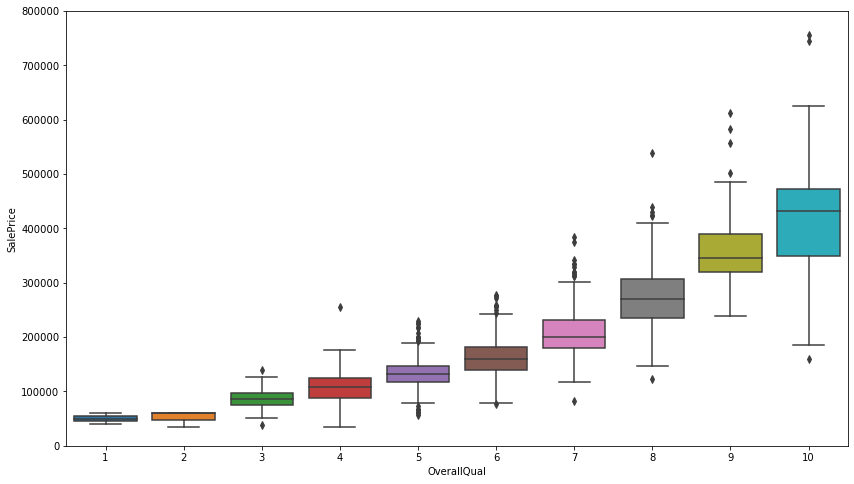

In [6]:
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

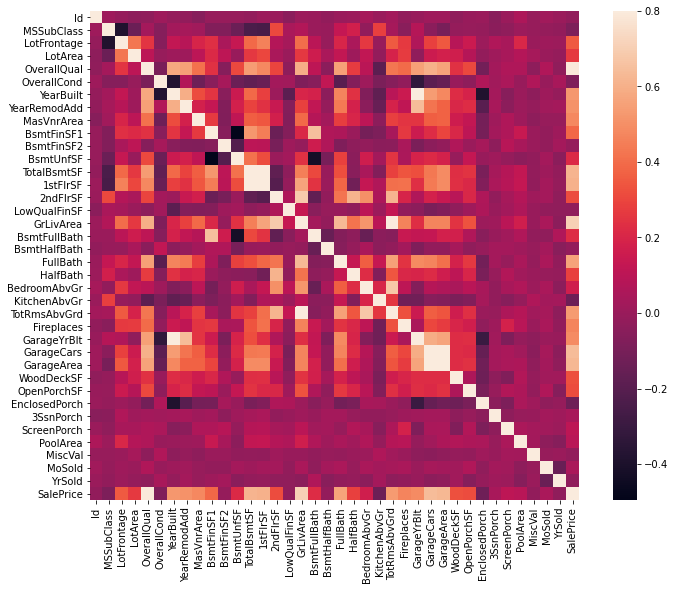

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

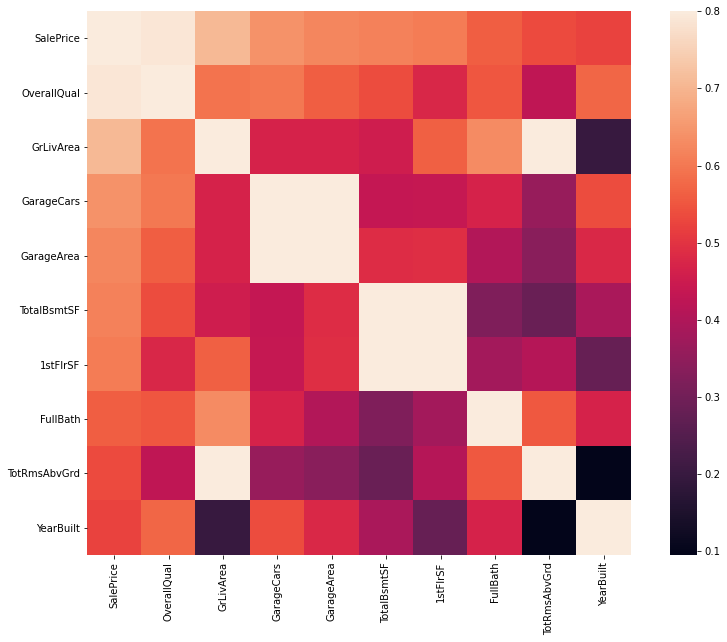

In [8]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df[cols].corr(), vmax=.8, square=True);

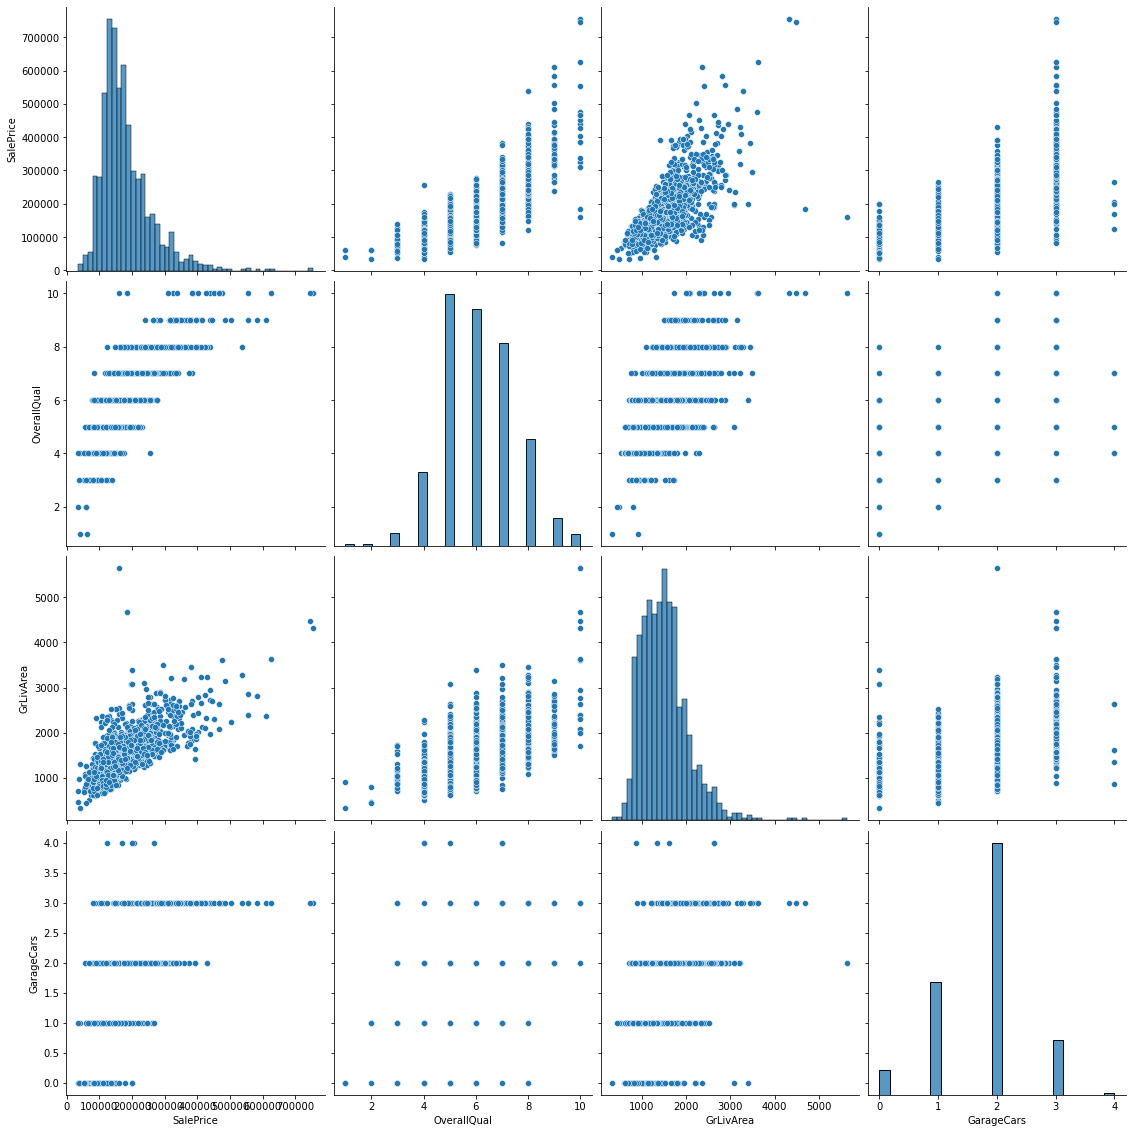

In [9]:
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']], height = 4);

In [10]:
missing_data = pd.concat([
    df.isnull().sum().sort_values(ascending=False),
    (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    ],
    axis=1,
    keys=['Total', 'Percent']
)

In [11]:
from sklearn.model_selection import train_test_split

x = df[['OverallQual', 'GrLivArea', 'GarageCars']]
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 
y = df['SalePrice']
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_val, y_val)

0.7103730514285557

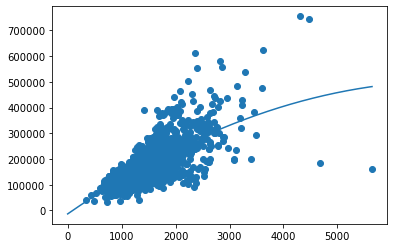

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

POLY_DEGREE = 2

x = np.asarray(df['GrLivArea'])

y = np.asarray(df['SalePrice'])

model = make_pipeline(PolynomialFeatures(POLY_DEGREE),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
xfit = np.linspace(0, max(x), 1000)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

In [20]:
model.predict([[6000]])

array([490997.51301394])